In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [20]:
df=pd.read_csv("store.csv")

In [21]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [22]:
df.shape #(row,columns)

(9994, 13)

## Data Exploration(exploration data analysis or EDA)

In [23]:
    df["Profit"].value_counts()

 0.0000      65
 6.2208      43
 9.3312      38
 5.4432      32
 3.6288      32
             ..
-3.5622       1
-7.4800       1
 626.1850     1
-12.8392      1
 6.1704       1
Name: Profit, Length: 7287, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


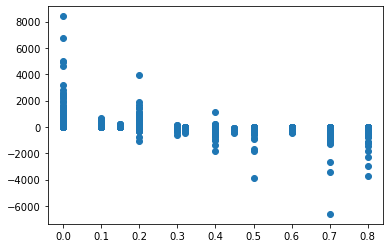

In [10]:
fig, ax= plt.subplots()
ax.scatter(df["Discount"],df["Profit"])

In [25]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [26]:
    df["Discount"].value_counts()
    df.drop(['Country'],axis=1,inplace=True)#We can drop country column since all are from the united states it will not affect

<AxesSubplot:ylabel='Frequency'>

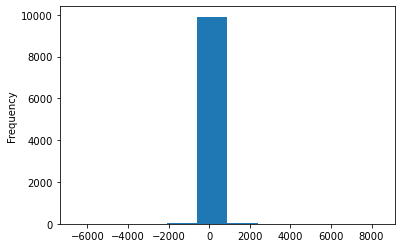

In [22]:
df.Profit.plot.hist()

## Coverting String to number


In [6]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]=content.astype("category").cat.as_ordered()

In [27]:
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label]=pd.Categorical(content).codes+1

In [28]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,3,1,195,16,42420,3,1,5,261.9600,2,0.00,41.9136
1,3,1,195,16,42420,3,1,6,731.9400,3,0.00,219.5820
2,3,2,267,4,90036,4,2,11,14.6200,2,0.00,6.8714
3,4,1,154,9,33311,3,1,17,957.5775,5,0.45,-383.0310
4,4,1,154,9,33311,3,2,15,22.3680,2,0.20,2.5164


In [29]:
#Correlation may=trix
#our main aim is to check the colummns correlation with profits column

<AxesSubplot:>

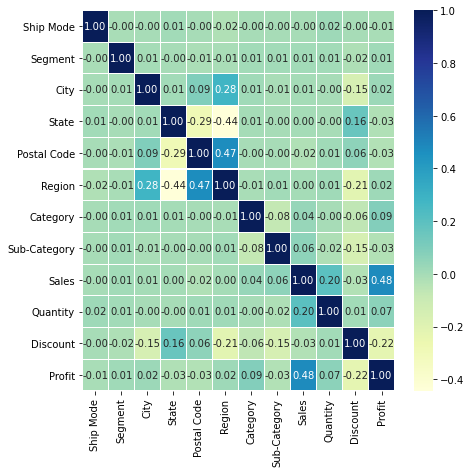

In [42]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, linewidths=0.1,
                    fmt=".2f", cmap="YlGnBu")

In [30]:
df.describe()# we take discount,quantity,sales,category columns since they have high correlation values to analyze

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,3.235041,1.658995,280.957274,23.343206,55190.379428,2.570642,1.972584,8.590454,229.858001,3.789574,0.156203,28.656896
std,1.100880,0.762622,139.157896,15.504611,32063.693350,1.162329,0.629544,5.051429,623.245101,2.225110,0.206452,234.260108
min,1.000000,1.000000,1.000000,1.000000,1040.000000,1.000000,1.000000,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,3.000000,1.000000,165.000000,5.000000,23223.000000,2.000000,2.000000,4.000000,17.280000,2.000000,0.000000,1.728750
50%,4.000000,1.000000,296.000000,28.000000,56430.500000,2.000000,2.000000,10.000000,54.490000,3.000000,0.200000,8.666500
75%,4.000000,2.000000,395.000000,37.000000,90008.000000,4.000000,2.000000,13.000000,209.940000,5.000000,0.200000,29.364000
max,4.000000,3.000000,531.000000,49.000000,99301.000000,4.000000,3.000000,17.000000,22638.480000,14.000000,0.800000,8399.976000


## Profit according to Sales

In [31]:
df.Sales.value_counts()

12.960     56
19.440     39
15.552     39
25.920     36
10.368     36
           ..
376.866     1
572.800     1
3.928       1
12.032      1
629.640     1
Name: Sales, Length: 5825, dtype: int64

In [32]:
pd.crosstab(df.Profit,df.Sales)# frequency comparison

Sales,0.444,0.556,0.836,0.852,0.876,0.898,0.984,0.990,1.044,1.080,...,8399.976,8749.950,9099.930,9449.950,9892.740,10499.970,11199.968,13999.960,17499.950,22638.480
Profit,,,,,,,,,,,,,,,,,,,,,
-6599.9780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-3839.9904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-3701.8928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-3399.9800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-2929.4845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4630.4755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4946.3700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5039.9856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
## in the second highest sale we have our highest profit

C:\Users\91983\anaconda3\envs\rasa\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


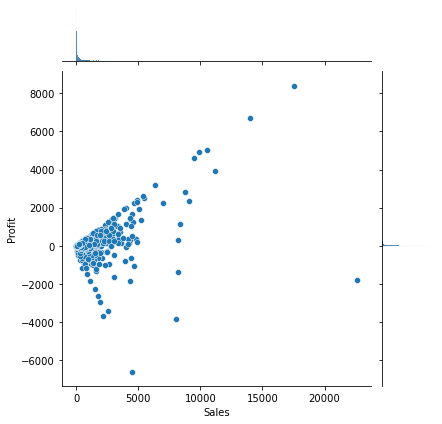

In [34]:
sns.jointplot(df["Sales"],df["Profit"])

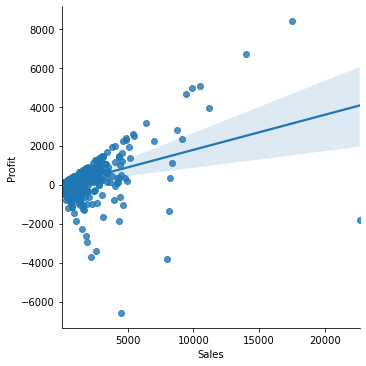

In [35]:
sns.lmplot(x="Sales",y="Profit",data=df)
##The line is coming to be an increasing slope one indicating a positive correlation

## Discount to profit

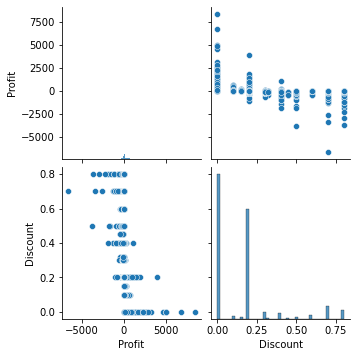

In [36]:
sns.pairplot(df[['Profit','Discount']])

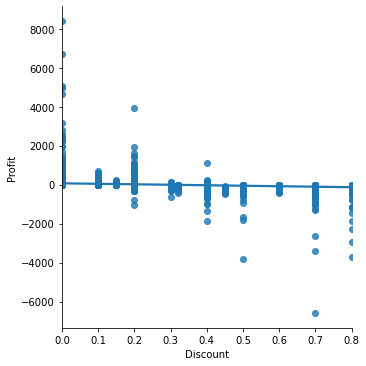

In [37]:
sns.lmplot(x="Discount",y="Profit",data=df)
##The mean line comes to the zero profit zone

In [38]:
df.Quantity.value_counts()

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64


## Profit vs Catgeory


C:\Users\91983\anaconda3\envs\rasa\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Category', ylabel='Profit'>

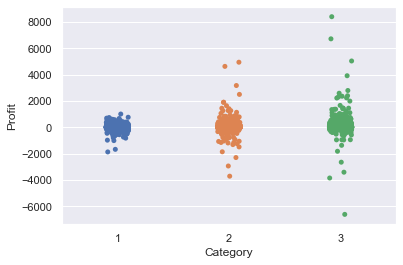

In [39]:
sns.set(color_codes=True)
sns.stripplot(df['Category'],df['Profit'])

In [40]:
## Profit comes to bet the highest in Category 3 aka Technology sector


## Profit vs Quantity

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

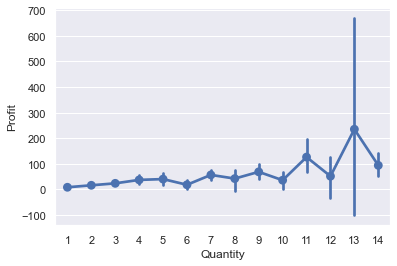

In [41]:

sns.pointplot(x="Quantity",y="Profit",data=df)


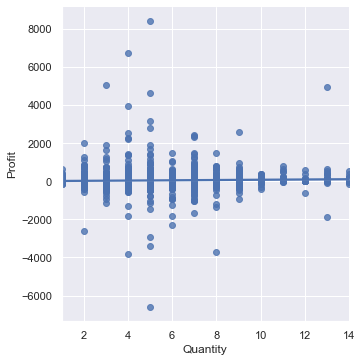

In [42]:
sns.lmplot(x="Quantity",y="Profit",data=df)

In [43]:
#The central tendency comes to be more specified around the 13 quantity entry for profits while the highest profit comes in 5 qunatity entry


## Profit vs subcategory

In [18]:
df1=pd.read_csv("store.csv")
df1

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## Sales in different region

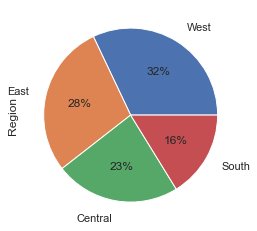

In [46]:
df1["Region"].value_counts().plot.pie(autopct='%1.0f%%', 
                                    labeldistance=1.2);

In [45]:
##west region is coming to be the highest in sales

## Profit as per Segment

C:\Users\91983\anaconda3\envs\rasa\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Segment', ylabel='Profit'>

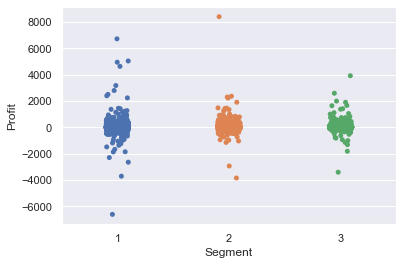

In [62]:
sns.set(color_codes=True)
sns.stripplot(df['Segment'],df['Profit'])

In [59]:
df1["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [60]:
##Segment wise profit is highest in segment 2

## Profit as per cities and states

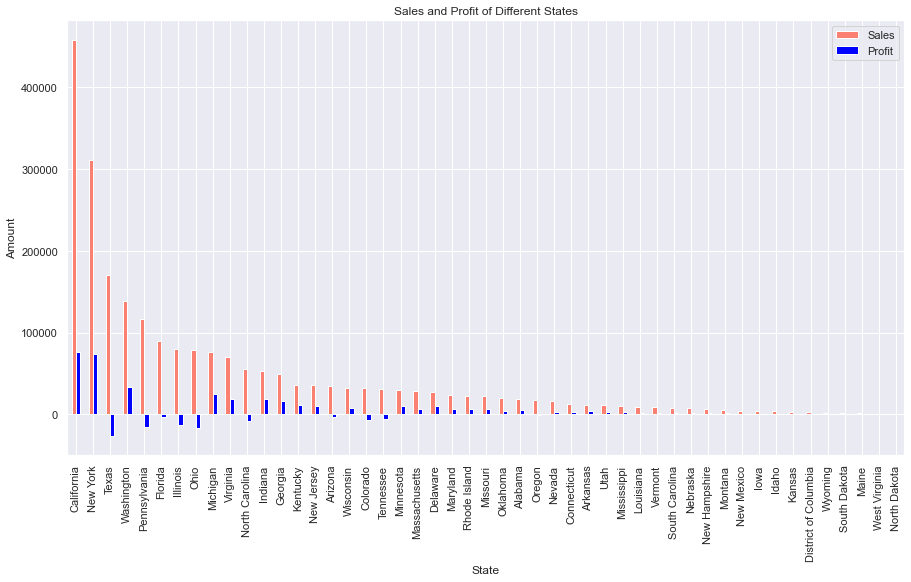

In [64]:
df1.groupby("State")[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False).plot(kind="bar",
                                                                                          figsize=(15,8),
                                                                                          color=["salmon","blue"]);
plt.title("Sales and Profit of Different States")
plt.xlabel("State")
plt.ylabel("Amount");